In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to C:\Users\PRACHI
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PRACHI
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\PRACHI TIWARI\OneDrive\Documents\Social_Media_Data.csv")
df.head()

,Text,Timestamp,Likes,Location,Shares
0,"""This product is amazing!""",12/1/2024 12:30,55,New York,25.0
1,"""Not happy with the service""",11/1/2024 12:31,48,London,49.0
2,"""Good Quality""",10/1/2024 12:32,46,America,28.0
3,"""Quality is amazing""",9/1/2024 12:33,51,Mumbai,88.0
4,"""Superb""",8/1/2024 1:25,24,New York,27.0


In [4]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [5]:
def clean_Text(Text):
    
    Text = re.sub(r'http\S+|www\S+|https\S+', '', Text, flags=re.MULTILINE)
    Text = re.sub(r'\@\w+|\#','', Text)
    Text = re.sub(r'[^\w\s]', '', Text)
    
    Text = ' '.join([word for word in Text.split() if word.lower() not in stop_words])
    return Text

In [6]:
df['Text'] = df['Text'].astype(str)
df['cleaned_Text'] = df['Text'].apply(clean_Text)

In [7]:
sia = SentimentIntensityAnalyzer()
def analyze_sentiment_vader(Text):
    score = sia.polarity_scores(Text)
    if score['compound'] > 0:
        return 'Positive'
    elif score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [8]:
df['vader_sentiment'] = df['cleaned_Text'].apply(analyze_sentiment_vader)

In [9]:
def analyze_sentiment_textblob(Text):
    polarity = TextBlob(Text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
df['textblob_sentiment'] = df['cleaned_Text'].apply(analyze_sentiment_textblob)

In [11]:
df['final_sentiment'] = np.where(df['vader_sentiment'] == df['textblob_sentiment'],
                                 df['vader_sentiment'], 'Mixed')

In [12]:
sentiment_counts = df['final_sentiment'].value_counts()

C:\Users\PRACHI TIWARI\AppData\Local\Temp\ipykernel_18720\1409532209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


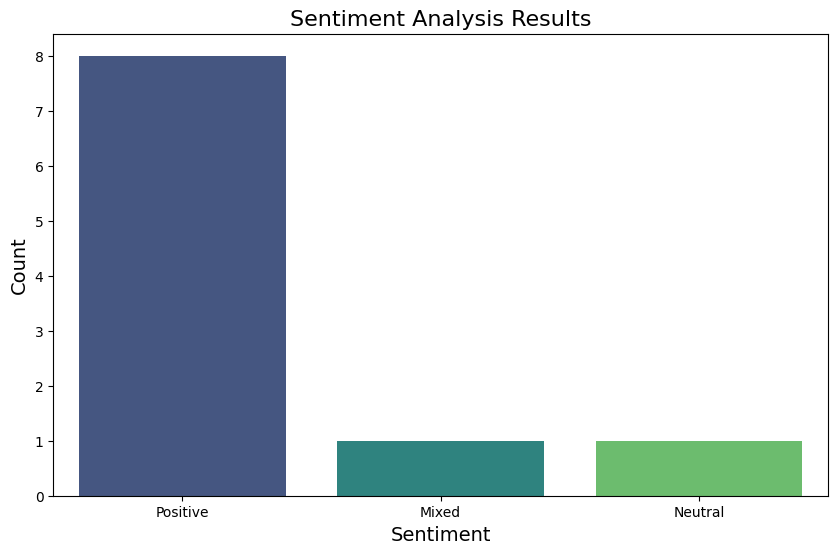

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis Results', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

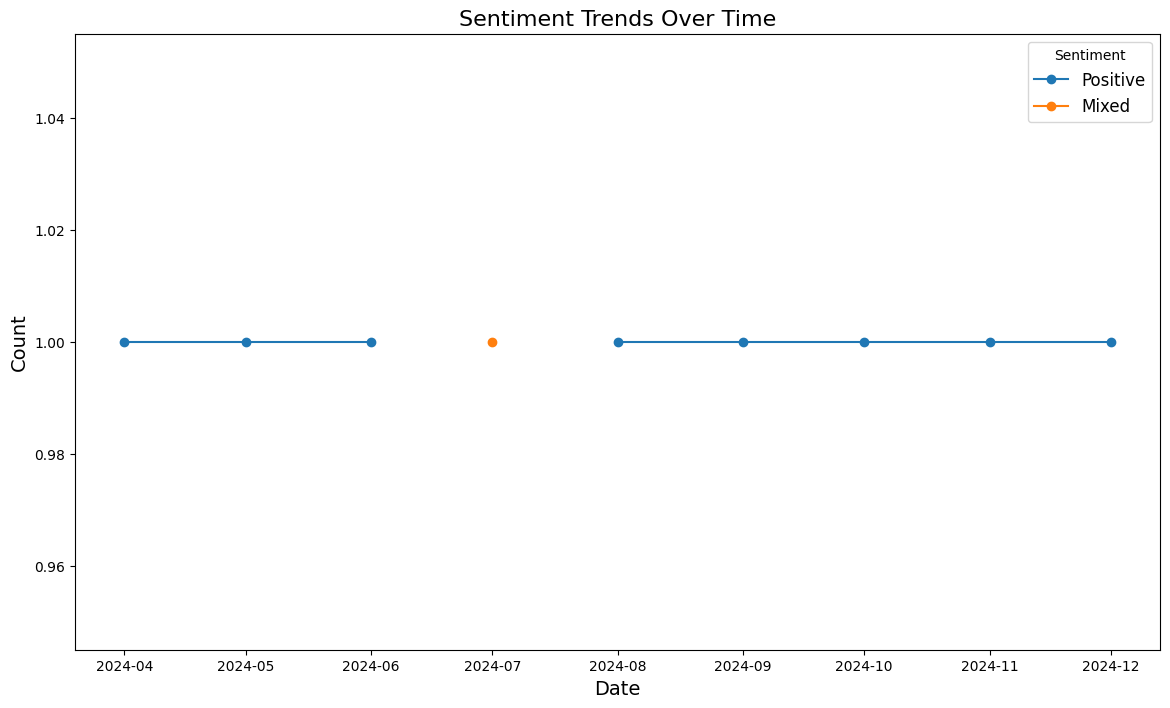

In [14]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    sentiment_over_time = df.groupby([df['Timestamp'].dt.date, 'final_sentiment']).size().unstack()
    
    sentiment_over_time.plot(kind='line', figsize=(14, 8), marker='o')
    plt.title('Sentiment Trends Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Sentiment', fontsize=12)
    plt.show()